In [53]:
import numpy as np
import matplotlib.pyplot as plt


from datamanagement import SlabFile
import os
import datetime
from time import *
#from slab import *
# from handy import prev_data
import sys 
project_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(project_path)
sys.path.append(project_path)
#new_path = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/'
new_path = r'G:/My Drive/Projects/Materials/materials-software/'

sys.path.append(new_path)
%load_ext autoreload
%autoreload 2
# import vna_measurement
# from ZNB import ZNB20

# add the following path to sys.path
path_of_meas_directory = r'C:\_Lib'
sys.path.append(path_of_meas_directory)
# import scresonators





c:\_Lib\scresonators
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
base_path = r'G:\Shared drives\SLab\Multimode\LinearMultimode\measurements\ena_meas_250910\S2Ps'
if not os.path.exists(base_path):
    os.makedirs(base_path)

# Utilities

In [55]:
def read_s2p_to_data(file_path, power_at_device=-50):
    s2p_data = []
    with open(file_path, 'r') as f:
        s2p_data = f.readlines()
    freqs = []
    amps = []
    phases = []
    for line in s2p_data:
        if line.startswith('!') or line.startswith('#'):
            continue
        parts = line.strip().split()
        if len(parts) >= 5:
            freq = float(parts[0])
            amp = float(parts[3])  # S21 amplitude in dB
            phase = float(parts[4])  # S21 phase in degrees
            freqs.append(freq)
            amps.append(amp)
            phases.append(phase)
    freqs = np.array(freqs)
    amps = np.array(amps)
    phases = np.array(phases)
    data = {
        "series": list(range(len(freqs))),
        "amps": amps,
        "phases": phases * np.pi / 180,  # convert degrees to radians
        "freqs": freqs,
        "vna_power": None,
        "power_at_device": power_at_device,
        "bandwidth": None,
        "averages": None,
        "npoints": len(freqs),
    }
    return data

# Sweep

In [56]:
modes = ['M1', 'M2','S1', 'S2', 'S3_1', 'S4', 'S5']
datas_dict = []
for mode in modes:
    file_name = f"{mode}.s2p"
    file_path = base_path + '\\' + file_name
    data = read_s2p_to_data(file_path)
    print(f"Data for {mode}: {data}")
    datas_dict.append(data)


Data for M1: {'series': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

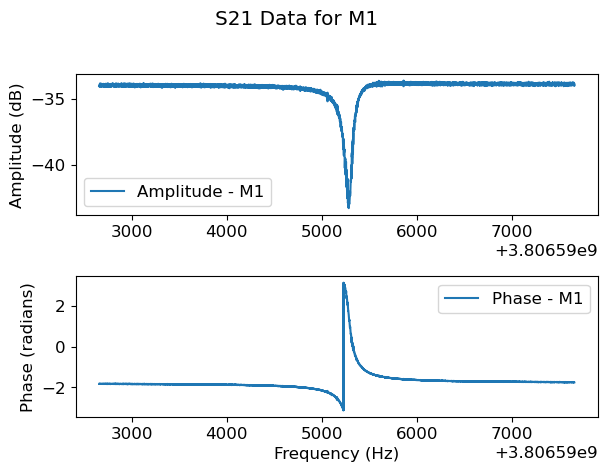

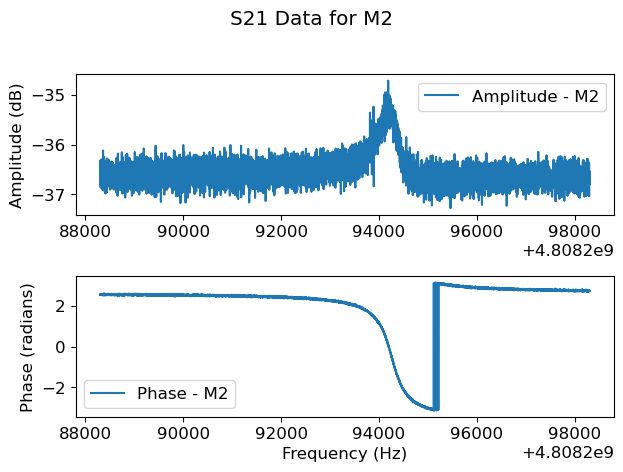

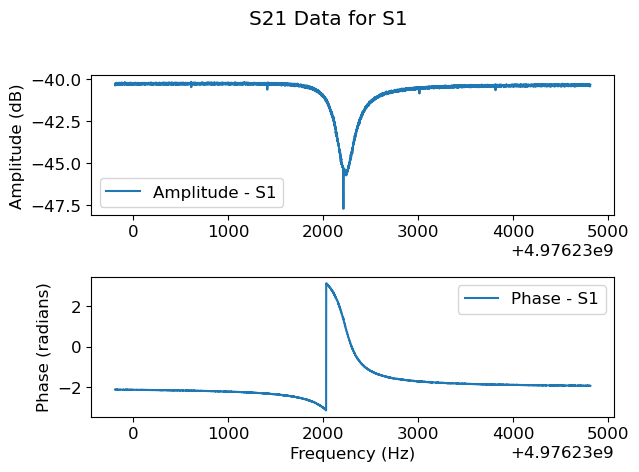

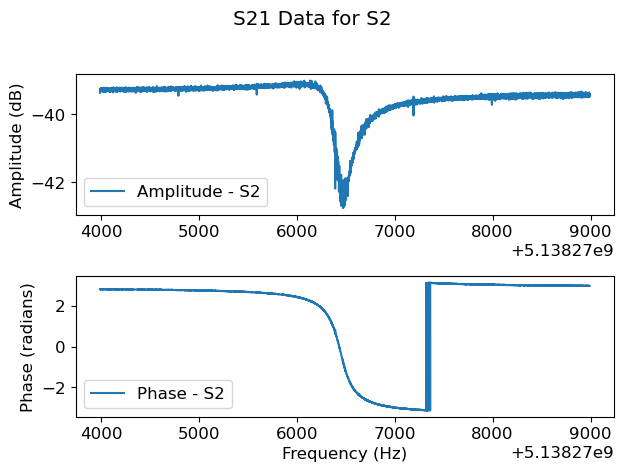

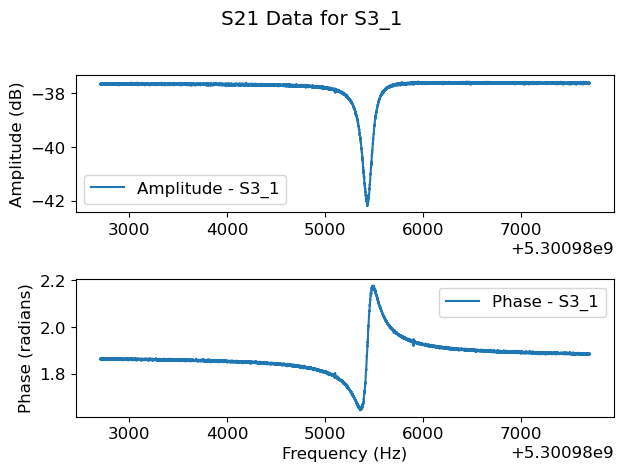

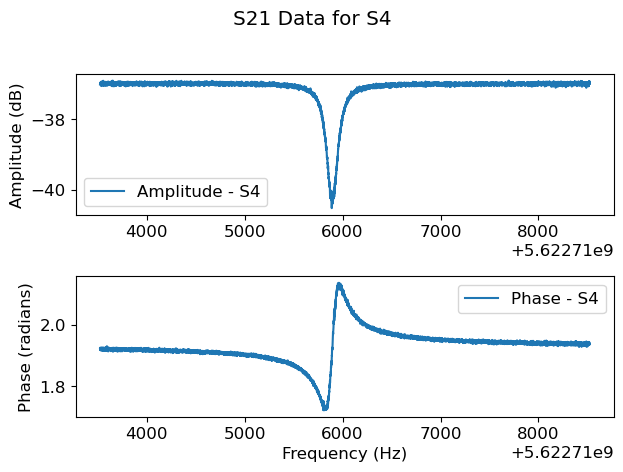

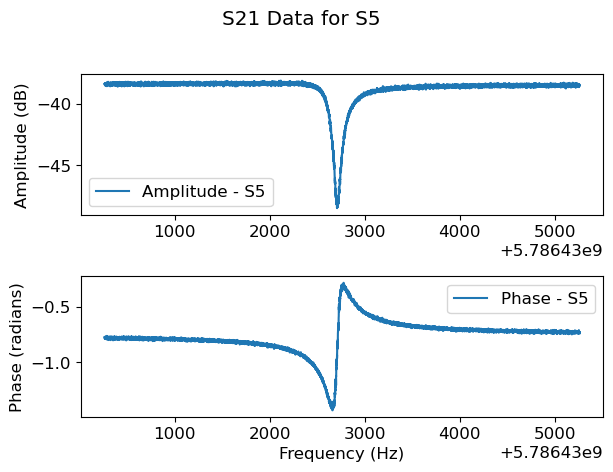

In [57]:
# Plot for all modes
for mode, data in zip(modes, datas_dict):
    plt.figure()
    plt.suptitle(f"S21 Data for {mode}")
    plt.subplot(2, 1, 1)
    plt.plot(data['freqs'], data['amps'], label=f"Amplitude - {mode}")
    plt.ylabel("Amplitude (dB)")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(data['freqs'], data['phases'], label=f"Phase - {mode}")
    plt.ylabel("Phase (radians)")
    plt.xlabel("Frequency (Hz)")
    plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

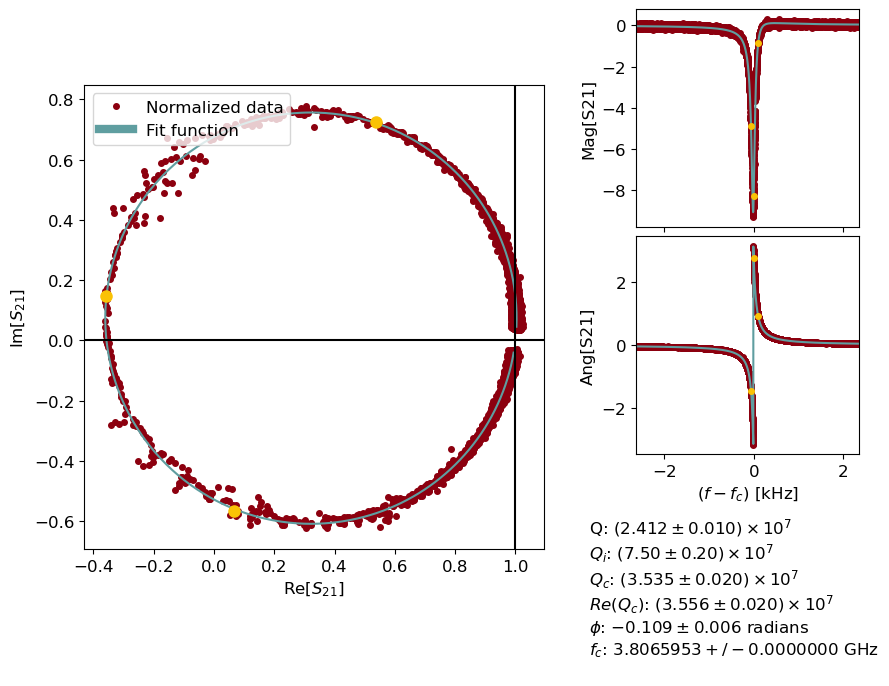

M1: Q = 24.13 million, Qi = 75.96 million, Qc = 35.35 million
([24125491.195627827, 35353843.18448495, 3806595298.551193, -0.10850664086973796], [128866.45981162414, 1993328.4852413684, 169757.92764928937, 170762.19239724427, 0.006133565401731156, 0.41500377655029297], 0.0015956979875771798, [23969171.577565633, 35121734.828657806, 3806595318.0, -0.10677025362082175])


<Figure size 640x480 with 0 Axes>

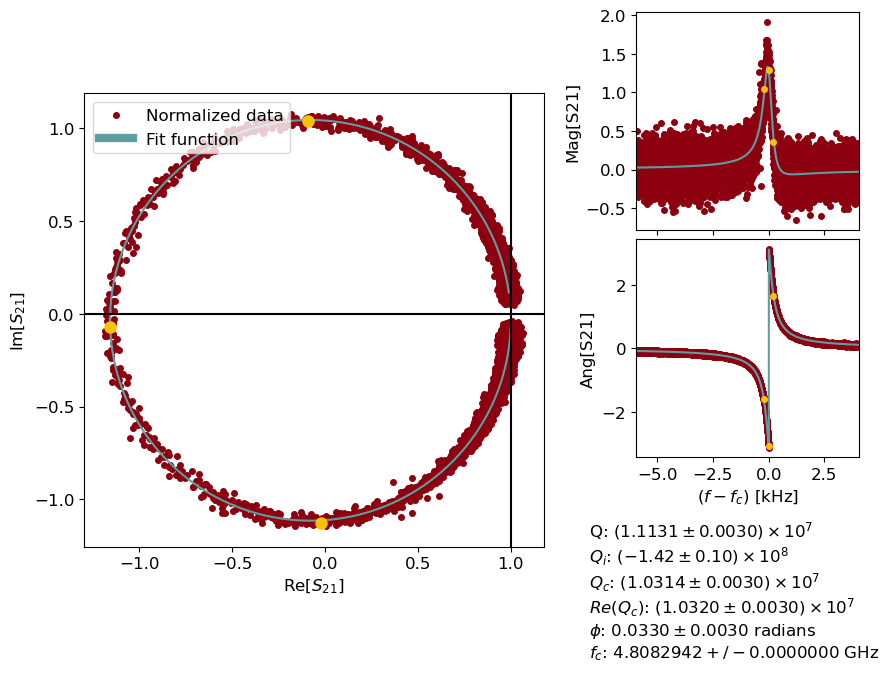

M2: Q = 11.13 million, Qi = -140.58 million, Qc = 10.31 million
([11131480.843337338, 10314740.875558903, 4808294246.982538, 0.03319303633009919], [34120.982546679676, 11543371.256886512, 28409.27439281158, 28424.931932643056, 0.0031571740290832, 0.5795745849609375], 0.0015315400901367785, [10969835.754782617, 10186391.25090719, 4808294243.0, 0.033554327089707243])


c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=15433425.831020173) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=15462982.219843704) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=19877500.684619155) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=19905934.583424326) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=4976232218.327782) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
S1: Q = 15.45 million, Qi = 69.16 million, Qc = 19.89 million
([15448204.025431938, 19891717.63402174, 4976232218.4937105, 0.045092135357047654], [inf, inf, inf, inf, 0.0006278816528248396, 0.08080577850341797], 0.0005494521371604079, [15836843.988782499, 20302498.415242355, 4976232222.0, 0.046566087686052526])


c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=20996551.435262527) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=24338388.395554673) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5138276433.636708) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.09286666658249725) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
S2: Q = 21.03 million, Qi = 153.70 million, Qc = 24.36 million
([21028597.153345563, 24361590.971030198, 5138276433.421937, 0.09414286438166458], [inf, 174030444.01605317, 35138.16844141483, 35294.45821353793, 0.0012302855232417392, 0.1540822982788086], 0.000784958477134247, [21043144.907366246, 24376773.14352327, 5138276434.0, 0.09678350875396817])


c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=33809202.33718843) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=168224680.45190257) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=168783910.85071456) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5300985436.999007) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5300985438.326032) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
S3_1: Q = 33.99 million, Qi = 42.58 million, Qc = 168.50 million
([33993763.31512122, 168504295.65130857, 5300985437.662519, -0.15109861510223546], [inf, inf, inf, inf, 3.141592653589793, inf], 0.00033129137770288356, [35476025.858214125, 174076280.7332872, 5300985431.0, -0.14720236337034018])


c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=33642778.373554654) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=34283069.395009674) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=210186921.3210788) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=211432095.7728887) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5622715893.251175) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
S4: Q = 33.96 million, Qi = 40.49 million, Qc = 210.81 million
([33962923.884282164, 210809508.54698375, 5622715892.061865, 0.029984123029159638], [inf, inf, inf, inf, 0.008464700717288425, 0.5503005981445312], 0.0004546688681225162, [35909313.343642525, 219699260.68760976, 5622715889.0, 0.014081824623738009])


c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=29377878.458787475) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=85851765.40204914) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=86267792.17852075) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=5786432698.165766) = 0.0 < max(sigmas)
  warn(errmsg)
c:\ProgramData\anaconda3\envs\slab\Lib\site-packages\lmfit\confidence.py:369: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.20303396019948292) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
S5: Q = 29.55 million, Qi = 45.00 million, Qc = 86.06 million
([29548363.102390684, 86059778.79028495, 5786432697.408665, 0.20772582360630137], [inf, inf, inf, inf, 0.002274427508120125, 0.11679744720458984], 0.00075797265217717, [29342004.172841627, 85563901.5976761, 5786432696.0, 0.2110339164585758])


<Figure size 640x480 with 0 Axes>

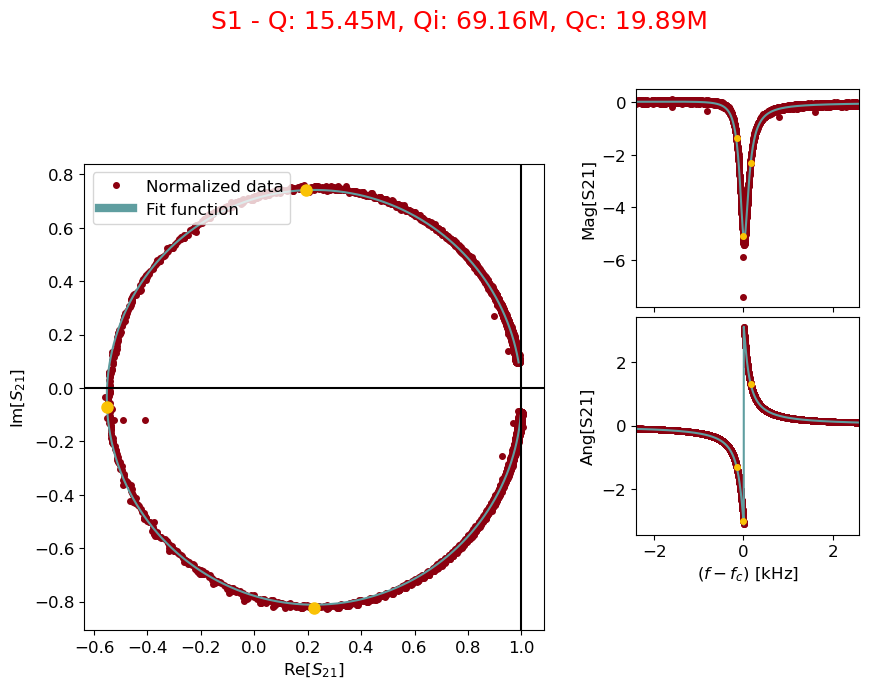

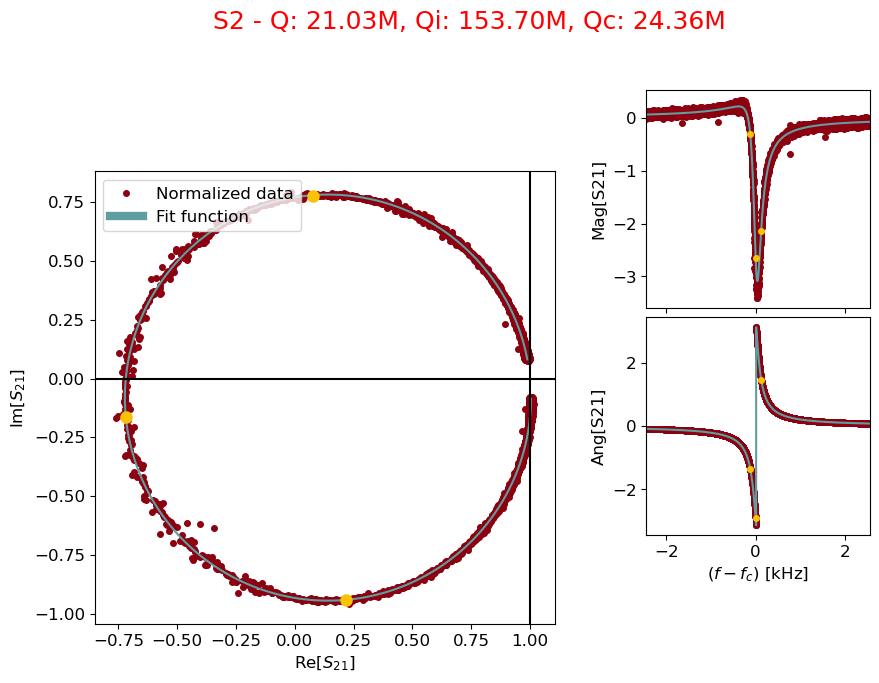

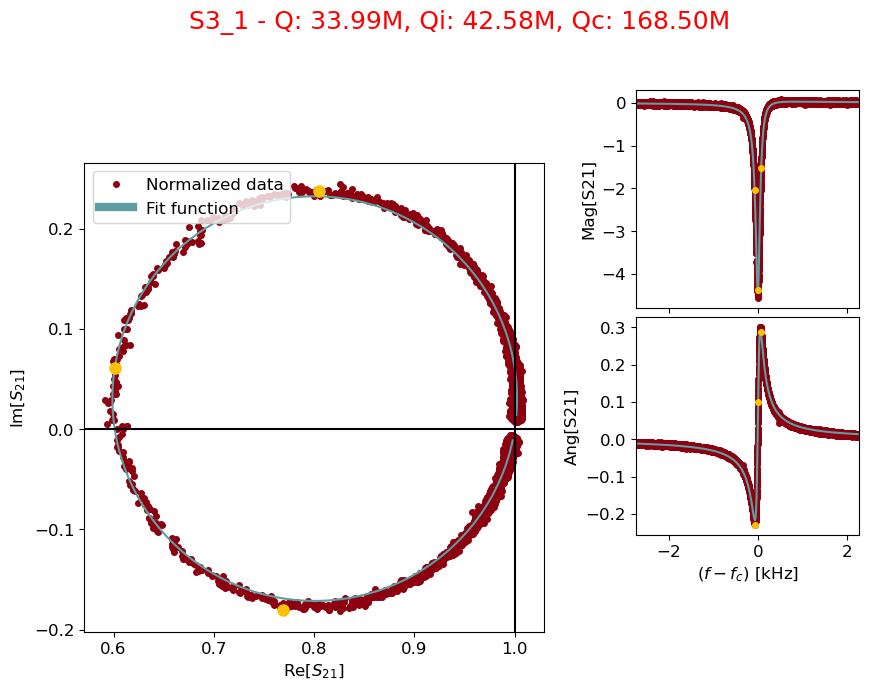

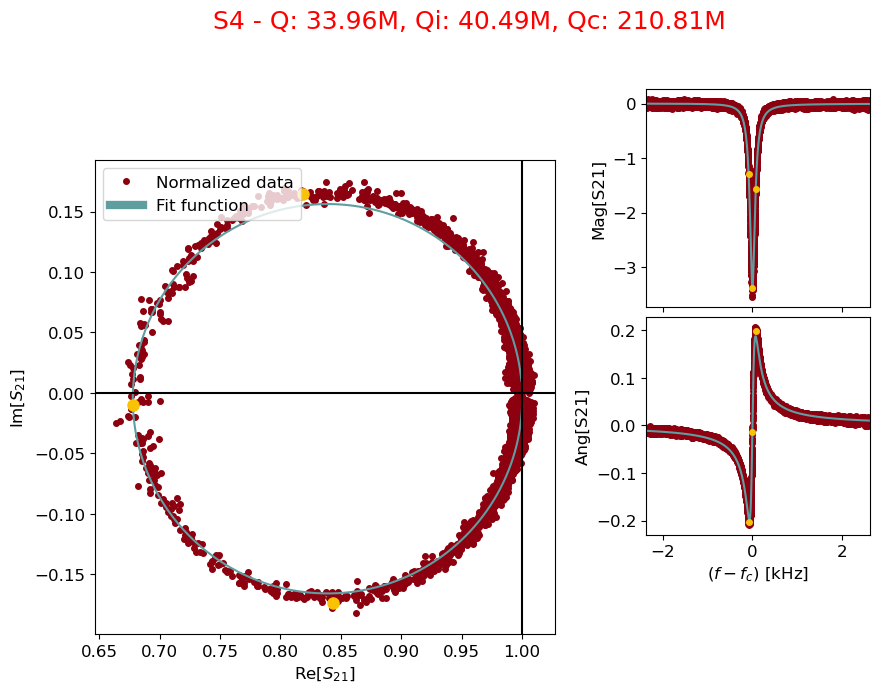

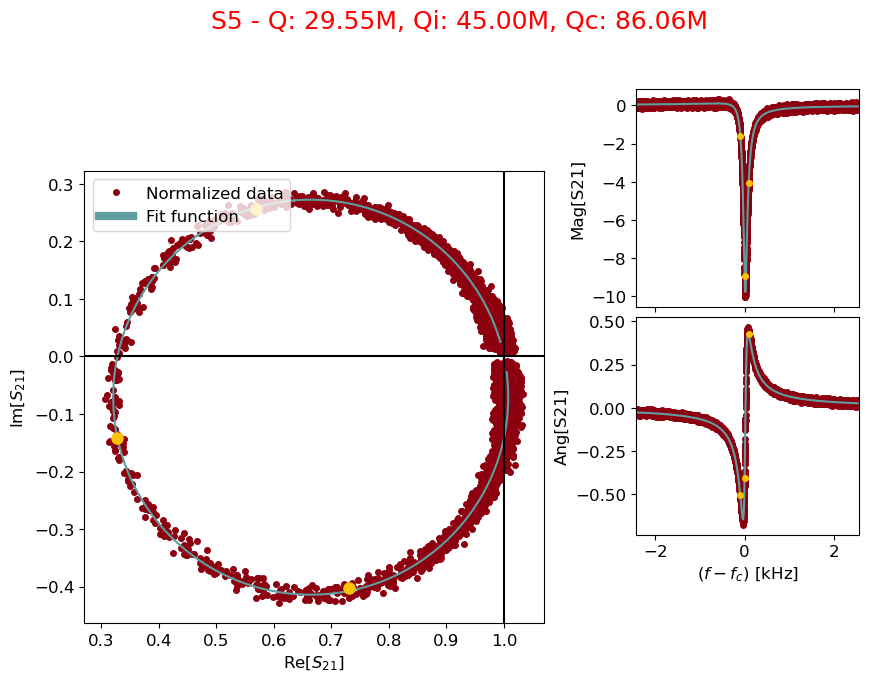

In [58]:
from scresonators.fit_resonator.ana_resonator import ResonatorFitter


for mode, data in zip(modes, datas_dict):
    output = ResonatorFitter.fit_resonator(
        data, mode, os.getcwd(), plot=True, fix_freq=False, fit_type='DCM REFLECTION'
    )
    Q, Qc, frequency, phase = output[0]
    Qi = 1 / (1/Q - 1/Qc)
    print(f"{mode}: Q = {Q/1e6:.2f} million, Qi = {Qi/1e6:.2f} million, Qc = {Qc/1e6:.2f} million")
    # Add Q, Qi and Qc as big text on the plot
    plt.gcf().suptitle(f"{mode} - Q: {Q/1e6:.2f}M, Qi: {Qi/1e6:.2f}M, Qc: {Qc/1e6:.2f}M", fontsize=18, color='red')
    plt.draw()
    file_path_for_saving= base_path + '\\plots\\'
    plt.savefig(f"{file_path_for_saving}{mode}_fit.png")
    # plt.pause(0.1)
    print(output)

# Quick Search

In [59]:
file_name = 'R1_2.s2p'
file_path = base_path + '\\' + file_name
# read the s2p file
'''
the s2p file has the follwing header 
!Agilent Technologies,E5071C,MY46110978,A.11.31
!Date: Thu Sep 11 07:08:37 2025
!Data & Calibration Information:
!Freq	S11:NONE(--)	S21:NONE(--)	S12:NONE(--)	S22:NONE(--)
!PortZ  Port1:50+j0    Port2:50+j0
!Above PortZ is port z conversion or system Z0 setting when saving the data.
!When reading, reference impedance value at option line is always used.
# Hz S dB R 50

I want to get frequency,amp and phase from this file 
'''
s2p_data = []
with open(file_path, 'r') as f:
    s2p_data = f.readlines()
# Parse s2p_data to extract frequency, amplitude (dB), and phase (degrees) for S21
freqs = []
amps = []
phases = []
for line in s2p_data:
    if line.startswith('!') or line.startswith('#'):
        continue
    parts = line.strip().split()
    if len(parts) >= 5:
        freq = float(parts[0])
        amp = float(parts[3])  # S21 amplitude in dB
        phase = float(parts[4])  # S21 phase in degrees
        freqs.append(freq)
        amps.append(amp)
        phases.append(phase)

freqs = np.array(freqs)
amps = np.array(amps)
phases = np.array(phases)

# now the fitter function expects the follwoing dictionary 
'''data = {
            "series": [_ for i in range(len(df_amps['Frequency']))],
            "amps": np.array(df_amps[' Formatted Data']),
            "phases": np.array(df_phase[' Formatted Data'])*np.pi/180,
            "freqs": np.array(df_amps['Frequency']),
            "vna_power": None,
            "power_at_device": -50,
            "bandwidth": None,
            "averages": None,
            "npoints": len(df_amps[' Formatted Data']),
        }'''
# make this for data above
data = {
    "series": list(range(len(freqs))),
    "amps": amps,
    "phases": phases * np.pi / 180,  # convert degrees to radians
    "freqs": freqs,
    "vna_power": None,
    "power_at_device": -50,
    "bandwidth": None,
    "averages": None,
    "npoints": len(freqs),
}

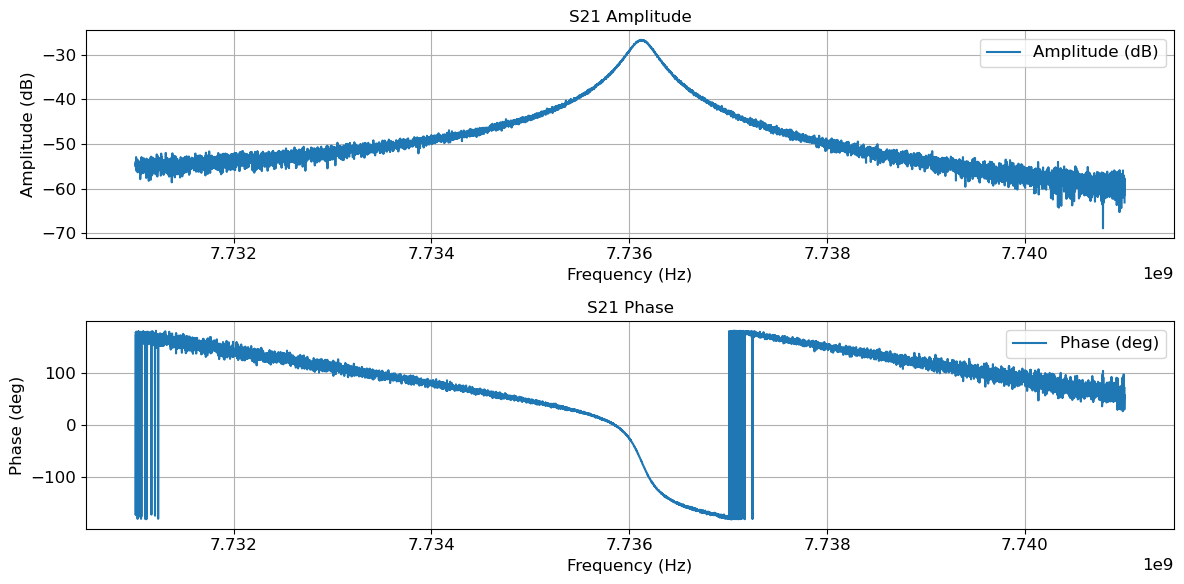

In [60]:
# plot the freqs amps and phases
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs, amps, label='Amplitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('S21 Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freqs, phases, label='Phase (deg)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (deg)')
plt.title('S21 Phase')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.


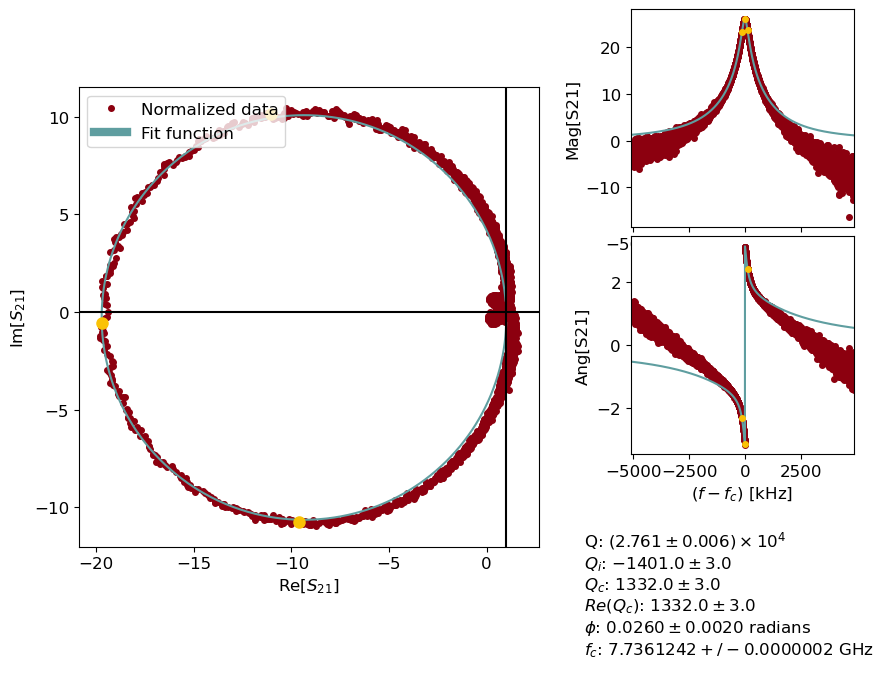

Qi: -0.00 million


In [61]:
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
output = ResonatorFitter.fit_resonator(data, 'try1', os.getcwd(), plot=True, fix_freq=False, fit_type='DCM' # note for reflection should be set to 'DCM REFLECTION'
        )

# the output contains 
'''Tuple containing:
            - List of fit parameters [Q, Qc, frequency, phase]
            - List of parameter errors'''
# can you use the equation 1/Q = 1/Qc + 1/Qi to extract Qi and print
Q, Qc, frequency, phase = output[0]
Qi = 1 / (1/Q - 1/Qc)
print(f"Qi: {Qi/1e6:.2f} million")